# Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

# Load Data

In [2]:
# Load cleaned data
df = pd.read_csv("../data/cleaned_heart_disease.csv")

# Separate inputs and outputs
X = df.drop(["target", "has_disease"], axis=1)
y_binary = df["has_disease"]
y_severity = df["target"]

# Feature Importance using Random Forest

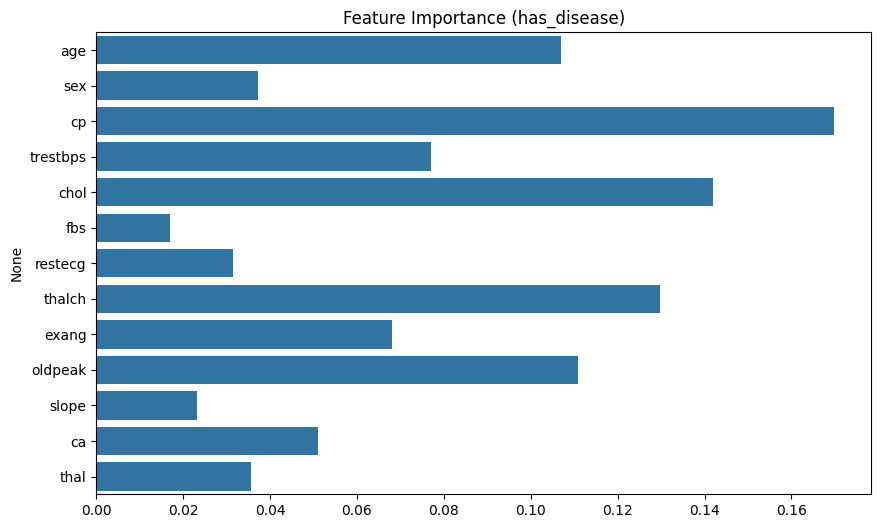

In [3]:
# Binary classification (has_disease)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y_binary)

# Feature importances
importances = model_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (has_disease)")
plt.show()


# Recursive Feature Elimination (RFE)

In [4]:
model_lr = LogisticRegression(max_iter=1000)
rfe = RFE(model_lr, n_features_to_select=5)  # Choose top 5 features
rfe.fit(X, y_binary)

# Display selected features
selected_rfe_features = X.columns[rfe.support_]
print("✔️ Selected Features by RFE (has_disease):", selected_rfe_features.tolist())


✔️ Selected Features by RFE (has_disease): ['sex', 'cp', 'exang', 'oldpeak', 'ca']


# Chi-Square Test

In [5]:

# Make all features non-negative (required for chi2)
X_chi = X.copy()
X_chi = X_chi.apply(lambda x: x - x.min() if x.min() < 0 else x)

chi_selector = SelectKBest(score_func=chi2, k=5)
chi_selector.fit(X_chi, y_binary)

selected_chi_features = X.columns[chi_selector.get_support()]
print("✔️ Selected Features by Chi-Square:", selected_chi_features.tolist())


✔️ Selected Features by Chi-Square: ['cp', 'thalch', 'exang', 'oldpeak', 'ca']


# Select only the most relevant features for modeling

In [6]:
all_selected_features = list(set(selected_rfe_features.tolist()) | set(selected_chi_features.tolist()))
print("✔️ All Selected Features:", all_selected_features)

X_reduced = X[all_selected_features]

# Save for modeling
X_reduced["has_disease"] = y_binary
X_reduced.to_csv("../data/reduced_features_has_disease.csv", index=False)

✔️ All Selected Features: ['ca', 'oldpeak', 'cp', 'sex', 'thalch', 'exang']


C:\Users\alyas\AppData\Local\Temp\ipykernel_22168\1554839264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced["has_disease"] = y_binary
